<a href="https://colab.research.google.com/github/FGalvao77/Identificando-cancer-de-prostata-com-PyCaret/blob/main/Identificando_c%C3%A2ncer_de_pr%C3%B3stata_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identificando _câncer de próstata_ com `PyCaret`**

---



## **1. Introdução**

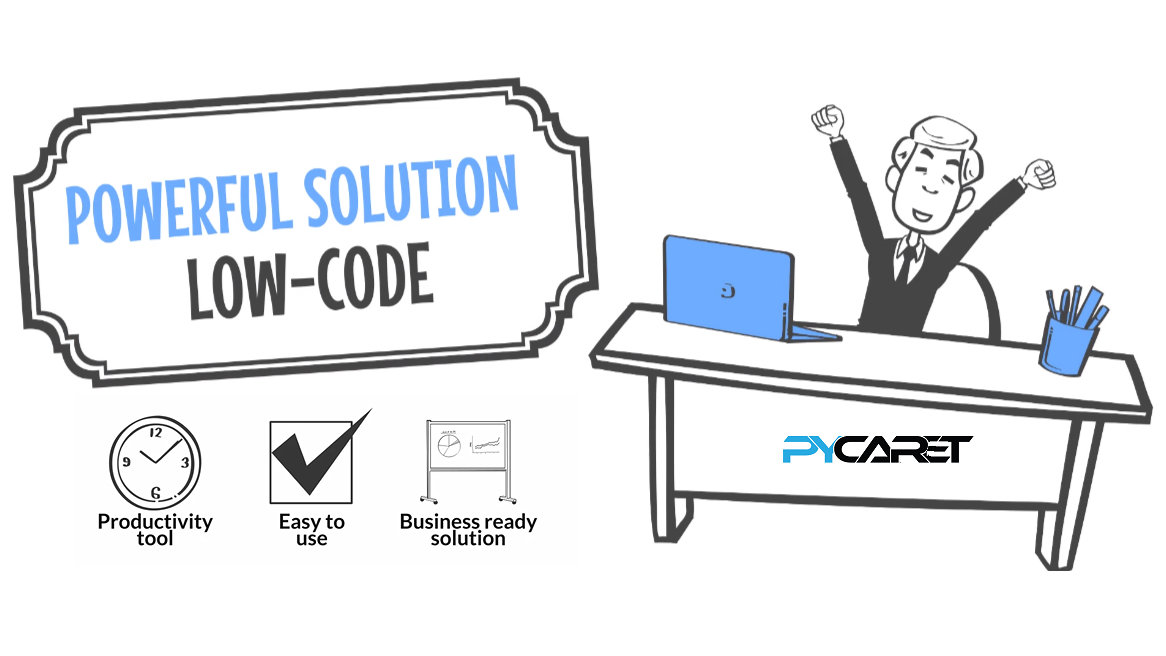

**Official Page:** https://pycaret.org/

**O que é o `PyCaret`?**

_`PyCaret` é uma biblioteca de aprendizado de máquina de código aberto e baixo código (**low-code**) em Python que permite ir desde a preparação de seus dados até a implantação de seu modelo em minutos, na escolha do ambiente de notebook._

Essa definição se encontra no próprio site da biblioteca - é uma tradução bem literal, vou tentar deixar mais claro a definição!

O principal propósito da biblioteca é otimizar as necessidades do profissional e trazer mais "produtividade" e entrega de análises/projetos de ciência de dados, aprendizado de máquinas e etc.

A biblioteca _"encapsula"_ ou melhor possui um `pipeline` de vários modelos e roda-os simultaneamente e por fim, **ranqueia** os modelos conforme um parâmetro definido de avaliação ou não pelo usuário.

## **2. Instalando a biblioteca**

In [1]:
# instalando a biblioteca "pycaret"
!pip install pycaret

## **3. Importando o conjunto de dados**

In [2]:
# instanciando a "url", salvei uma cópia dos dados no meu repositório de datasetes do github
url = 'https://raw.githubusercontent.com/FGalvao77/datasets/main/Prostate_Cancer.csv'

In [3]:
# importando a biblioteca para modelagem de dados
import pandas as pd

In [4]:
# realizando o carregamento e leitura do conjunto de dados
data = pd.read_csv(url, sep=',')

In [5]:
# visualizando o tipo do objeto
type(data)

pandas.core.frame.DataFrame

In [6]:
# visualizando as 5 primeiras linhas
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## **4. Preparando os dados**

In [7]:
# realizando um mapeamento da variável "resultado_diagnostico" e atualizando o nome das instâncias presentes
data['diagnosis_result'] = data['diagnosis_result'].map({'M': 'maligno', 
                                                         'B': 'benigno'})

In [8]:
# visualizando as instâncias únicas da variável "diagnosis_result" e contabilizando-as
data['diagnosis_result'].value_counts()

maligno    62
benigno    38
Name: diagnosis_result, dtype: int64

In [9]:
# instanciando o conjunto de dados nas variáveis X e y
X = data 
y = data

In [10]:
# realizando o reset dos índices
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [11]:
# visualizando a dimensão das variáveis
X.shape, y.shape

((100, 10), (100, 10))

In [12]:
# importando a função para realizar a partição dos dados em treino e teste
from sklearn.model_selection import train_test_split

# dividindo os dados das variáveis X e y em partes para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, # 30% dos dados para teste
                                                    random_state=123)

In [13]:
# visualizando o tamanho das particões dos dados
len(X_train), len(X_test), len(y_train), len(y_test)

(70, 30, 70, 30)

In [14]:
# visualizando o tipo de objeto dos particionamento dos dados em treino e teste
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

## **5. Aplicando o classificador**

In [15]:
# importando a função para classificação
from pycaret.classification import*

In [16]:
# inicializando o pipeline de classificação
classificador = setup(X_train,                          # dados de entrada do treinamento
                      ignore_features = ['id'],         # ignorando o recurso "id"
                      remove_outliers=True,             # removendo dados discrepantes
                      normalize=True,                   # normalizando os dados
                      fold=5,                           # validação cruzada
                    #   pca=True,                         # reduzindo a dimensionalidade dos dados
                      target='diagnosis_result',        # instanciando a variável alvo
                      feature_selection=True,           # aplicando selecão dos recursos
                      feature_selection_threshold=0.7,  # limite para seleção de recursos
                      ignore_low_variance=True,         # ignorando baixa variância
                      remove_multicollinearity=True,    # removendo multicolinearidade
                      multicollinearity_threshold=0.7,  # definindo um limite para descarte da multicolinearidade
                      remove_perfect_collinearity=True, # removendo colinearidade perfeita
                      silent=True)                      # controla a entrada de confirmação de tipos de dados

,Description,Value
0,session_id,1016
1,Target,diagnosis_result
2,Target Type,Binary
3,Label Encoded,"benigno: 0, maligno: 1"
4,Original Data,"(70, 10)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
# visualizando o melhor classificador pela métrica ACCURACY (acurácia)
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9333,0.9556,0.9667,0.9429,0.9510,0.8448,0.8605,0.542
lr,Logistic Regression,0.9111,0.9667,0.9667,0.9095,0.9359,0.7909,0.8024,0.544
gbc,Gradient Boosting Classifier,0.8889,0.9222,0.8667,0.9667,0.9121,0.7615,0.7743,0.064
svm,SVM - Linear Kernel,0.8667,0.0000,0.9000,0.9167,0.8981,0.6943,0.7265,0.014
et,Extra Trees Classifier,0.8667,0.9111,0.9333,0.8881,0.9045,0.6793,0.7093,0.480
knn,K Neighbors Classifier,0.8444,0.9389,0.9667,0.8310,0.8919,0.6164,0.6536,0.140
dt,Decision Tree Classifier,0.8444,0.8500,0.8333,0.9381,0.8749,0.6674,0.6939,0.018
ridge,Ridge Classifier,0.8444,0.0000,0.9333,0.8667,0.8913,0.6138,0.6581,0.014
ada,Ada Boost Classifier,0.8444,0.9500,0.8667,0.9095,0.8777,0.6590,0.6870,0.090
lda,Linear Discriminant Analysis,0.8222,0.8556,0.9333,0.8381,0.8760,0.5593,0.6093,0.014


In [18]:
# o classificar melhor ranqueado
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1016, verbose=0,
                       warm_start=False)

In [20]:
# instanciando o classificador com melhor performance
best_classifier = create_model(best_model, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.8056,1.0000,0.8571,0.9231,0.7273,0.7559
3,0.8889,0.9722,0.8333,1.0000,0.9091,0.7692,0.7906
4,0.8889,1.0000,1.0000,0.8571,0.9231,0.7273,0.7559
Mean,0.9333,0.9556,0.9667,0.9429,0.9510,0.8448,0.8605
SD,0.0544,0.0758,0.0667,0.0700,0.0403,0.1277,0.1146


In [21]:
# visualizando os parâmetros do modelo
best_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1016, verbose=0,
                       warm_start=False)

In [22]:
# "tunando" o classificador
tuned_classifier = tune_model(best_classifier, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.00,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.00,1.0000,1.0000,1.0000
2,0.7778,0.7778,1.0000,0.75,0.8571,0.4000,0.5000
3,0.8889,1.0000,0.8333,1.00,0.9091,0.7692,0.7906
4,1.0000,1.0000,1.0000,1.00,1.0000,1.0000,1.0000
Mean,0.9333,0.9556,0.9667,0.95,0.9532,0.8338,0.8581
SD,0.0889,0.0889,0.0667,0.10,0.0596,0.2346,0.1966


In [23]:
# realizando as predições com o classificador "tunado"
predictions = predict_model(tuned_classifier, data=X_test)

In [24]:
# visualizando os valores reais VS as predições realizadas pelo modelo "tunado"
predictions[['diagnosis_result', 'Label']].head(10)     # as 10 primeiras predições

,diagnosis_result,Label
8,maligno,maligno
70,maligno,maligno
82,maligno,maligno
28,maligno,maligno
63,benigno,benigno
0,maligno,maligno
5,benigno,maligno
50,benigno,benigno
81,benigno,maligno
4,maligno,maligno


In [25]:
# visualizando graficamente a performance do modelo
evaluate_model(best_classifier);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

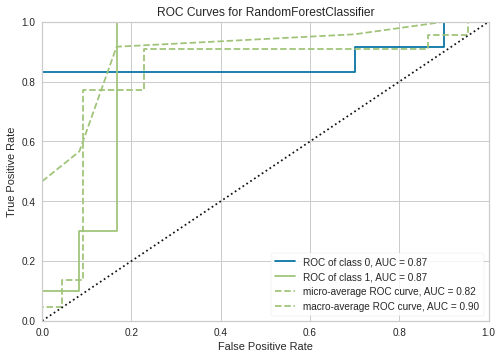

In [26]:
# visualizando o gráfico da curva ROC
plot_model(tuned_classifier)

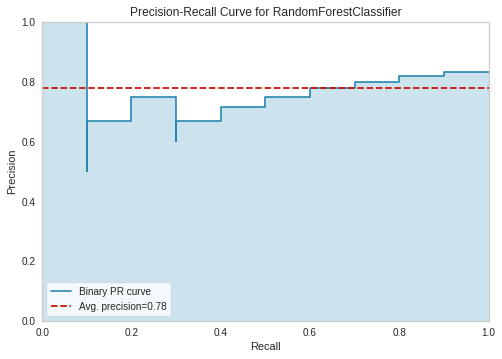

In [27]:
# visualizando o gráfico da curva de precisão-recall
plot_model(tuned_classifier, plot='pr')

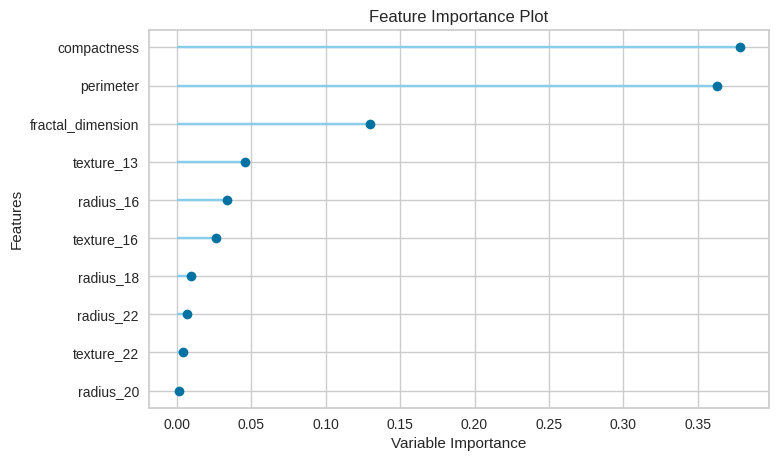

In [29]:
# visualizando os recursos de maior importância para o modelo
plot_model(tuned_classifier, plot='feature')

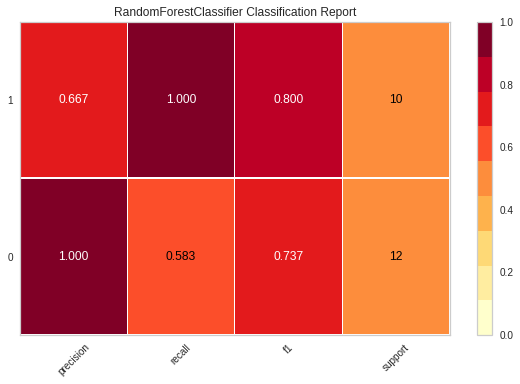

In [30]:
# visualizando o relatório de classificação
plot_model(tuned_classifier, plot='class_report')

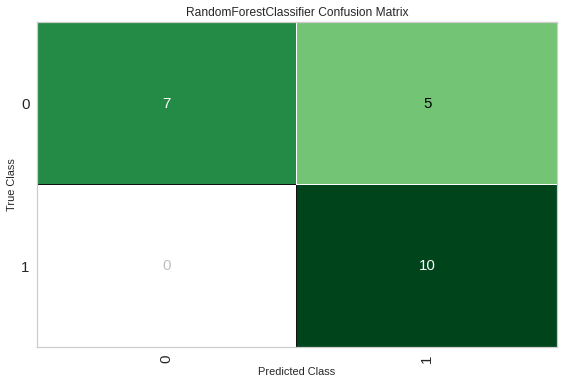

In [31]:
# visualizando a matriz de confusão
plot_model(tuned_classifier, plot='confusion_matrix')

In [32]:
# visualizando as métricas do modelo "tunado"
predict_model(tuned_classifier);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7727,0.8667,1.0,0.6667,0.8,0.56,0.6236


In [33]:
# finalizando e instanciando o modelo "tunado"
best_tunedModel = finalize_model(tuned_classifier)

In [34]:
# visualizando os parâmetros do modelo "tunado"
best_tunedModel

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=1016, verbose=0,
                       warm_start=False)

In [35]:
# visualizando as métricas de desempenho do modelo
predict_model(best_tunedModel);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9545,1.0,1.0,0.9091,0.9524,0.9091,0.9129


In [36]:
# aplicando o modelo nos dados de "y_ytrain"
unseen_predictions = predict_model(best_tunedModel, data=y_train)

# visualizando os valores reais VS valores preditos
unseen_predictions[['diagnosis_result', 'Label']].head(15)

,diagnosis_result,Label
21,benigno,benigno
90,benigno,benigno
33,maligno,maligno
69,benigno,benigno
84,benigno,benigno
87,maligno,maligno
95,maligno,maligno
97,benigno,benigno
62,maligno,maligno
12,benigno,benigno


In [37]:
# importando a função para avaliação
from pycaret.utils import check_metric

# checando a performance do modelo, usando como métrica de referência acurácia
check_metric(unseen_predictions.diagnosis_result, unseen_predictions.Label, 'Accuracy')

0.9714

In [38]:
# salvando o modelo
save_model(best_tunedModel,'Final Classifier Model 07Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['id'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='diagnosis_result',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=11, max_features='log2',
                                         

In [39]:
# instanciando o modelo salvo na variável "saved_final_RandFor"
saved_final_model = load_model('Final Classifier Model 07Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [40]:
# realizando novas predições com modelo final salvo 
new_prediction = predict_model(saved_final_model, data=y_test)

In [41]:
# visualizando os valores reais VS valores preditos
pd.DataFrame(new_prediction[['diagnosis_result', 'Label']].head(10))

,diagnosis_result,Label
8,maligno,maligno
70,maligno,maligno
82,maligno,maligno
28,maligno,maligno
63,benigno,benigno
0,maligno,maligno
5,benigno,maligno
50,benigno,benigno
81,benigno,maligno
4,maligno,maligno


In [42]:
# importando a função para avaliação
from pycaret.utils import check_metric

# visualizando a performance do modelo, usando como métrica acurácia
check_metric(new_prediction.diagnosis_result, new_prediction.Label, 'Accuracy')

0.8667